<a href="https://colab.research.google.com/github/jonas-richter/tara_guidi2016_data/blob/data_exploration/Eukaryote_abundance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Eukaryotes count per sample

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import plotly.express as px
sns.set()
## ML
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# read data
euk_norm = pd.read_csv('https://github.com/jonas-richter/tara_guidi2016_data/blob/data_exploration/data/euk.norm.ab.tsv?raw=true',
                  on_bad_lines='skip', sep='\t', header = 0)

In [3]:
# view data
euk_norm.loc[range(len(euk_norm))]

,Sample,Metazoa_Morula+musiva,Spumellarida_Actinomma+boreale,Basidiomycota_Malassezia+slooffiae,Cryptophyta_Rhodomonas+sp.,Metazoa_Ircinia+felix_f._felix,Ascomycota_Cladosporium+cladosporioides,Microsporidiomycota_Ovipleistophora+mirandellae,Collodaria_Sphaerozoum+punctatum,MALV-II_MALV-II-Clade-29_X+sp.,...,Ciliophora_Tintinnopsis+dadayi,Pelagophyceae_Pelagophyceae_XXX+sp.,Pinguiophyceae_Pinguiochrysis+pyriformis,Ciliophora_Tintinnopsis+lacustris,Metazoa_Corynactis,Metazoa_Gastrochaena+dubia,Choanoflagellida_Salpingoeca+urceolata,Bacillariophyta_Corethron+inerme,Entomophthoromycota_Entomophthora+schizophorae,Haptophyta_Calyptrosphaera+radiata
0,S4DCM,0.0,0.000000e+00,0.0,0.000000,0.0,0.0,0.000000e+00,0.000059,0.0,...,0.0,0.000050,0.000000e+00,0.000000e+00,5.987868e-07,0.000000e+00,0.000000e+00,1.080810e-04,0.0,0.0
1,S4SUR,0.0,0.000000e+00,0.0,0.000000,0.0,0.0,0.000000e+00,0.000755,0.0,...,0.0,0.000025,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.214899e-07,0.0,0.0
2,S7DCM,0.0,0.000000e+00,0.0,0.000000,0.0,0.0,0.000000e+00,0.000004,0.0,...,0.0,0.000005,0.000000e+00,0.000000e+00,0.000000e+00,1.243662e-05,9.949298e-07,0.000000e+00,0.0,0.0
3,S7SUR,0.0,0.000000e+00,0.0,0.000000,0.0,0.0,0.000000e+00,0.000195,0.0,...,0.0,0.000027,4.726870e-07,0.000000e+00,0.000000e+00,1.559867e-05,7.090304e-07,0.000000e+00,0.0,0.0
4,S9DCM,0.0,0.000000e+00,0.0,0.000000,0.0,0.0,3.425431e-07,0.000010,0.0,...,0.0,0.000140,0.000000e+00,0.000000e+00,2.264210e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,S123SUR,0.0,0.000000e+00,0.0,0.000003,0.0,0.0,0.000000e+00,0.079476,0.0,...,0.0,0.000007,0.000000e+00,0.000000e+00,0.000000e+00,2.581848e-07,0.000000e+00,0.000000e+00,0.0,0.0
63,S124DCM,0.0,0.000000e+00,0.0,0.000000,0.0,0.0,0.000000e+00,0.002406,0.0,...,0.0,0.000003,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
64,S124SUR,0.0,0.000000e+00,0.0,0.000001,0.0,0.0,0.000000e+00,0.008742,0.0,...,0.0,0.000008,0.000000e+00,1.583480e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0
65,S125DCM,0.0,3.688101e-07,0.0,0.000000,0.0,0.0,0.000000e+00,0.027424,0.0,...,0.0,0.000000,0.000000e+00,1.229367e-07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0


In [4]:
# info
euk_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Columns: 1762 entries, Sample to Haptophyta_Calyptrosphaera+radiata
dtypes: float64(1761), object(1)
memory usage: 922.4+ KB


In [5]:
# make Eukaryotic lineages as row name
euk_norm_2 = euk_norm.set_index('Sample')
# plot
#px.imshow(euk_norm_2, aspect = 0.2)

In [6]:
# center and scale data (account for some species being overall higher or lower abundant)
sc = StandardScaler()
# apply scaler
euk_scaled = sc.fit_transform(euk_norm_2.to_numpy())
# convert to pandas data frame
euk_scaled = pd.DataFrame(euk_scaled, columns=[euk_norm_2.columns])

In [7]:
# show first n rows
euk_scaled.head()

,Metazoa_Morula+musiva,Spumellarida_Actinomma+boreale,Basidiomycota_Malassezia+slooffiae,Cryptophyta_Rhodomonas+sp.,Metazoa_Ircinia+felix_f._felix,Ascomycota_Cladosporium+cladosporioides,Microsporidiomycota_Ovipleistophora+mirandellae,Collodaria_Sphaerozoum+punctatum,MALV-II_MALV-II-Clade-29_X+sp.,Metazoa_Podocoryna+exigua,...,Ciliophora_Tintinnopsis+dadayi,Pelagophyceae_Pelagophyceae_XXX+sp.,Pinguiophyceae_Pinguiochrysis+pyriformis,Ciliophora_Tintinnopsis+lacustris,Metazoa_Corynactis,Metazoa_Gastrochaena+dubia,Choanoflagellida_Salpingoeca+urceolata,Bacillariophyta_Corethron+inerme,Entomophthoromycota_Entomophthora+schizophorae,Haptophyta_Calyptrosphaera+radiata
0,-0.123091,-0.192477,-0.183126,-0.330579,-0.123091,-0.159349,-0.175379,-0.443093,-0.184435,-0.152960,...,-0.123091,0.495695,-0.256440,-0.460707,-0.229176,-0.196347,-0.172921,3.624727,-0.123091,-0.199446
1,-0.123091,-0.192477,-0.183126,-0.330579,-0.123091,-0.159349,-0.175379,-0.424101,-0.184435,-0.152960,...,-0.123091,-0.037549,-0.256440,-0.460707,-0.245507,-0.196347,-0.172921,-0.211689,-0.123091,-0.199446
2,-0.123091,-0.192477,-0.183126,-0.330579,-0.123091,-0.159349,-0.175379,-0.444595,-0.184435,0.627327,...,-0.123091,-0.476012,-0.256440,-0.460707,-0.245507,4.977705,6.591874,-0.230290,-0.123091,-0.199446
3,-0.123091,-0.192477,-0.183126,-0.330579,-0.123091,-0.159349,-0.175379,-0.439386,-0.184435,-0.152960,...,-0.123091,-0.006643,-0.226202,-0.460707,-0.245507,6.293222,4.647967,-0.230290,-0.123091,-0.199446
4,-0.123091,-0.192477,-0.183126,-0.330579,-0.123091,-0.159349,5.589007,-0.444442,-0.184435,-0.152960,...,-0.123091,2.470767,-0.256440,-0.460707,5.929695,-0.196347,-0.172921,-0.230290,-0.123091,-0.199446


In [65]:
# calculate variance across cols (sample origins)
# to identify potential marker for environmental factors
var = euk_norm_2.var(axis=0)

# convert to df
var_2 = pd.DataFrame(var, columns=["variance"])

# inspect
var_2.info

<bound method DataFrame.info of                                                     variance
Metazoa_Morula+musiva                           6.463082e-12
Spumellarida_Actinomma+boreale                  8.823901e-15
Basidiomycota_Malassezia+slooffiae              9.201213e-15
Cryptophyta_Rhodomonas+sp.                      5.049768e-12
Metazoa_Ircinia+felix_f._felix                  2.326869e-15
...                                                      ...
Metazoa_Gastrochaena+dubia                      5.865084e-12
Choanoflagellida_Salpingoeca+urceolata          2.195870e-14
Bacillariophyta_Corethron+inerme                7.979527e-10
Entomophthoromycota_Entomophthora+schizophorae  2.855646e-14
Haptophyta_Calyptrosphaera+radiata              3.476817e-15

[1761 rows x 1 columns]>

In [42]:
# sort df by variance
var_sort = var_2.sort_values(['variance'], ascending=[False])
# view
var_sort.head()

,variance
Unclassified,0.011057
Metazoa_Calanoida,0.005920
Metazoa_Gaetanus+variabilis,0.002281
Collodaria_Acrosphaera+sp.,0.002034
Collodaria_Sphaerozoum+punctatum,0.001362


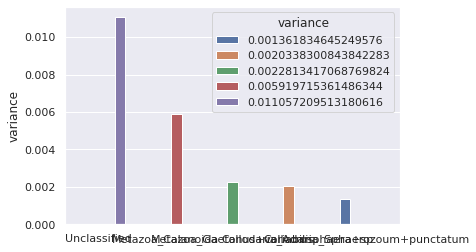

In [61]:
# visualization as barplot
sns.barplot(x=var_sort.iloc[range(5)].index, y="variance", data=var_sort.iloc[range(5)], hue = 'variance')

In [63]:
# explore species with highest variance
# Metazoa_Calanoida
euk_norm['Metazoa_Calanoida'].values

array([0.00215354, 0.00903325, 0.02945515, 0.01996204, 0.13734367,
       0.0467181 , 0.09208545, 0.07473609, 0.03683328, 0.03830367,
       0.06496426, 0.07316376, 0.04565783, 0.10993605, 0.25611121,
       0.08978497, 0.10037635, 0.18121928, 0.13266409, 0.21136909,
       0.03631119, 0.04847676, 0.09947679, 0.06755009, 0.18652583,
       0.04262558, 0.08873873, 0.04666326, 0.11410924, 0.1128577 ,
       0.07176279, 0.08640995, 0.09157838, 0.11120048, 0.13773771,
       0.02551123, 0.18680232, 0.00536976, 0.06442582, 0.08315995,
       0.0295449 , 0.18681807, 0.1200136 , 0.13472919, 0.07900858,
       0.16404617, 0.18842469, 0.08891292, 0.10309038, 0.04779511,
       0.07699176, 0.10517442, 0.08543871, 0.41131902, 0.29833726,
       0.12416718, 0.08329872, 0.06766665, 0.11029684, 0.16672026,
       0.12453022, 0.33815616, 0.18299789, 0.20049116, 0.19626283,
       0.15044464, 0.12247854])

In [64]:
# Metazoa_Gaetanus+variabilis
euk_norm['Metazoa_Gaetanus+variabilis'].values

array([0.05950623, 0.23671628, 0.03273667, 0.09516441, 0.07590617,
       0.06420125, 0.09329749, 0.19496332, 0.03181673, 0.05136892,
       0.04794953, 0.06183536, 0.04572298, 0.17785624, 0.04690248,
       0.02712757, 0.10855489, 0.03655294, 0.01914451, 0.0246876 ,
       0.0174214 , 0.03548195, 0.02473991, 0.03206012, 0.12863471,
       0.04712073, 0.03916727, 0.00792467, 0.00888504, 0.00275669,
       0.00107106, 0.01654836, 0.01111783, 0.01677251, 0.01242523,
       0.00368772, 0.02487082, 0.02423088, 0.16990685, 0.09251834,
       0.00460008, 0.01379802, 0.05025492, 0.04870329, 0.07233789,
       0.01754455, 0.02591694, 0.01512803, 0.01570635, 0.03731977,
       0.04335205, 0.02607213, 0.01893616, 0.00473784, 0.00685047,
       0.01670715, 0.00694091, 0.02155813, 0.01896206, 0.01403864,
       0.00690618, 0.0175064 , 0.01651363, 0.0096268 , 0.01401681,
       0.01068713, 0.00786606])